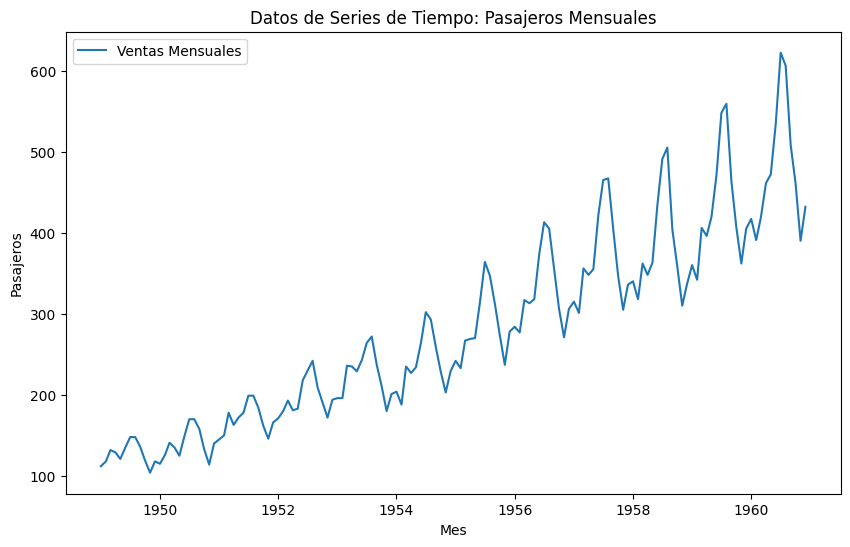

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/content/AirPassengers.csv'
data = pd.read_csv(file_path)

# Cargar datos de ejemplo
data = pd.read_csv('/content/AirPassengers.csv', parse_dates=['Month'], index_col='Month')
series = data['#Passengers']

# Plotear los datos
plt.figure(figsize=(10, 6))
plt.plot(series, label='Pasajeros Mensuales')
plt.title('Datos de Series de Tiempo: Pasajeros Mensuales')
plt.xlabel('Mes')
plt.ylabel('Pasajeros')
plt.legend()
plt.show()

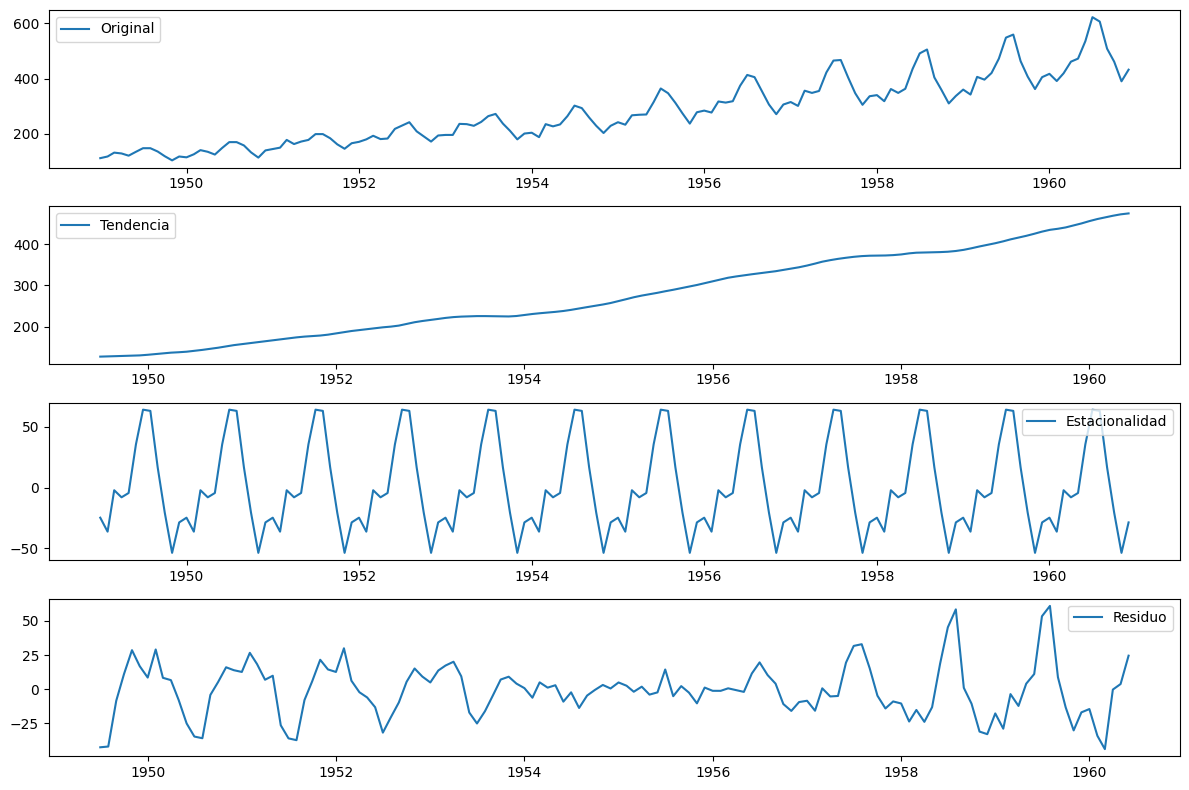

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Descomponer la serie de tiempo
decomposition = seasonal_decompose(series, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plotear los componentes
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(series, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuo')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

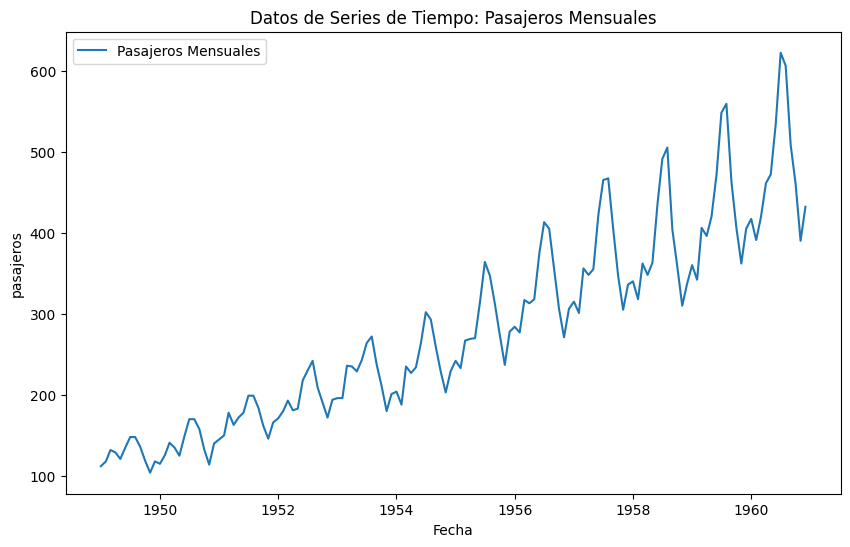

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641


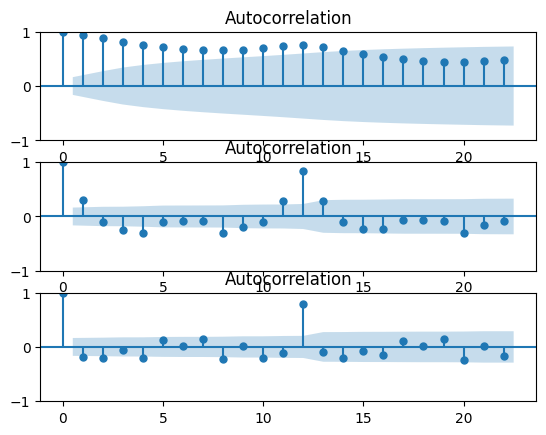

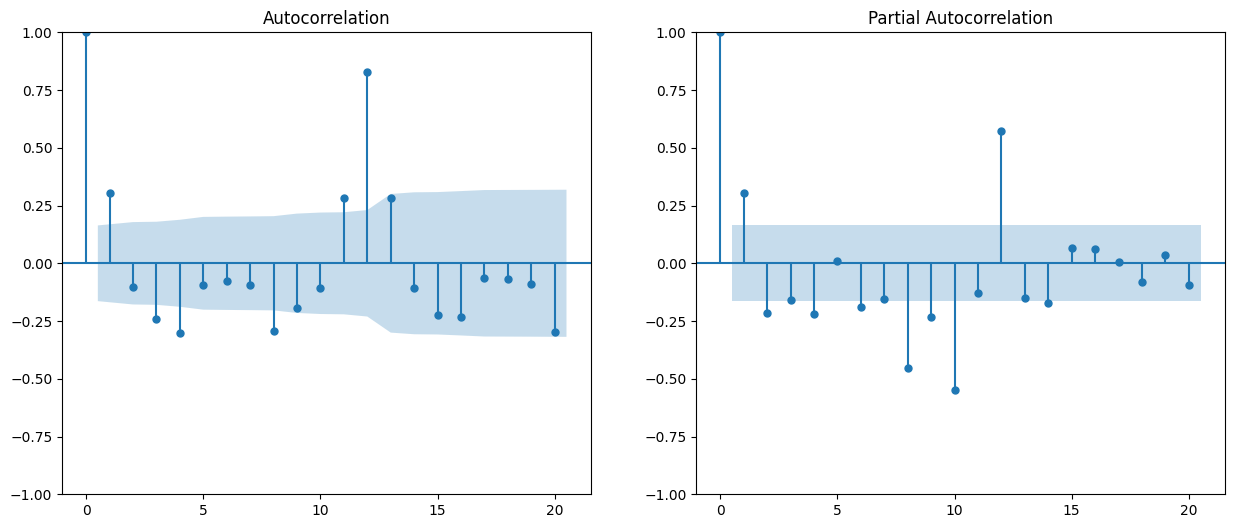

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# Cargar datos de ejemplo
file_path = '/content/AirPassengers.csv'
data = pd.read_csv(file_path)

# Cargar datos de ejemplo
data = pd.read_csv('/content/AirPassengers.csv', parse_dates=['Month'], index_col='Month')
series = data['#Passengers']

# Plotear la serie de tiempo original
plt.figure(figsize=(10, 6))
plt.plot(series, label='Pasajeros Mensuales')
plt.title('Datos de Series de Tiempo: Pasajeros Mensuales')
plt.xlabel('Fecha')
plt.ylabel('pasajeros')
plt.legend()
plt.show()

# Verificar estacionariedad utilizando la prueba de Dickey-Fuller aumentada
result = adfuller(series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Si la serie no es estacionaria, diferenciar los datos
differenced_series = series.diff().dropna()

from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(series, ax=ax1)
plot_acf(series.diff().dropna(), ax=ax2)
plot_acf(series.diff().diff().dropna(), ax=ax3)

# Identificación de los parámetros p y q utilizando ACF y PACF
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sm.graphics.tsa.plot_acf(differenced_series, lags=20, ax=axes[0])
sm.graphics.tsa.plot_pacf(differenced_series, lags=20, ax=axes[1])
plt.show()




/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(7, 1, 2)   Log Likelihood                -675.954
Date:                Wed, 17 Jul 2024   AIC                           1371.908
Time:                        04:41:50   BIC                           1401.537
Sample:                    01-01-1949   HQIC                          1383.948
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1350      0.282      0.478      0.633      -0.419       0.689
ar.L2          0.2894      0.199      1.457      0.145      -0.100       0.679
ar.L3         -0.3151      0.170     -1.857      0.0

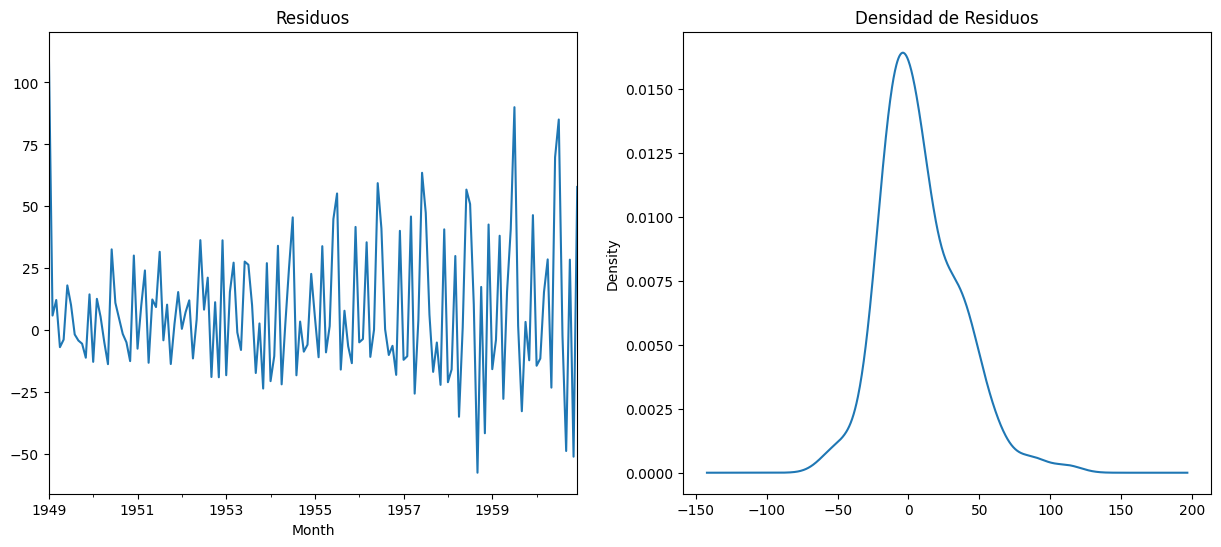

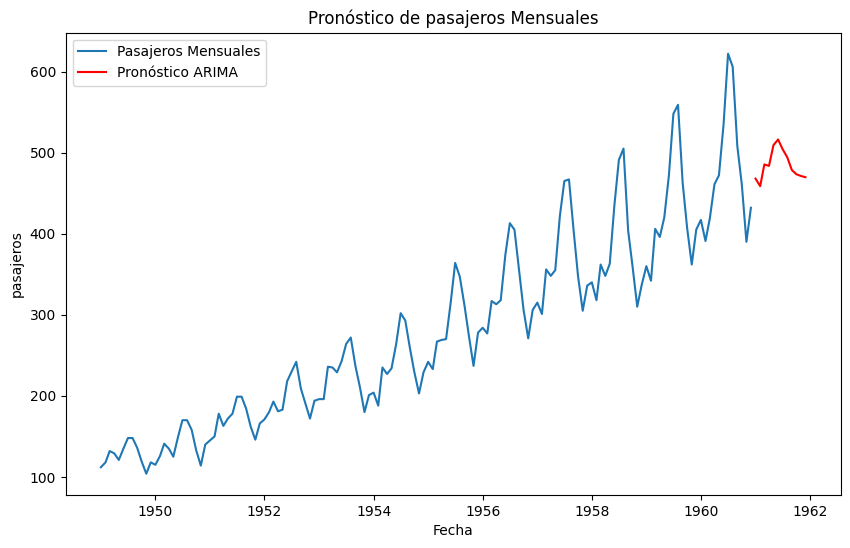

In [12]:

# Construcción del modelo ARIMA
model = ARIMA(series, order=(7, 1, 2))  # Ajustar p, d, q según los gráficos ACF y PACF
model_fit = model.fit()

# Resumen del modelo
print(model_fit.summary())

# Diagnóstico de residuos
residuals = model_fit.resid
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
residuals.plot(title="Residuos", ax=axes[0])
residuals.plot(kind='kde', title='Densidad de Residuos', ax=axes[1])
plt.show()

# Pronóstico
forecast = model_fit.forecast(steps=12)
plt.figure(figsize=(10, 6))
plt.plot(series, label='Pasajeros Mensuales')
plt.plot(forecast, label='Pronóstico ARIMA', color='red')
plt.title('Pronóstico de pasajeros Mensuales')
plt.xlabel('Fecha')
plt.ylabel('pasajeros')
plt.legend()
plt.show()

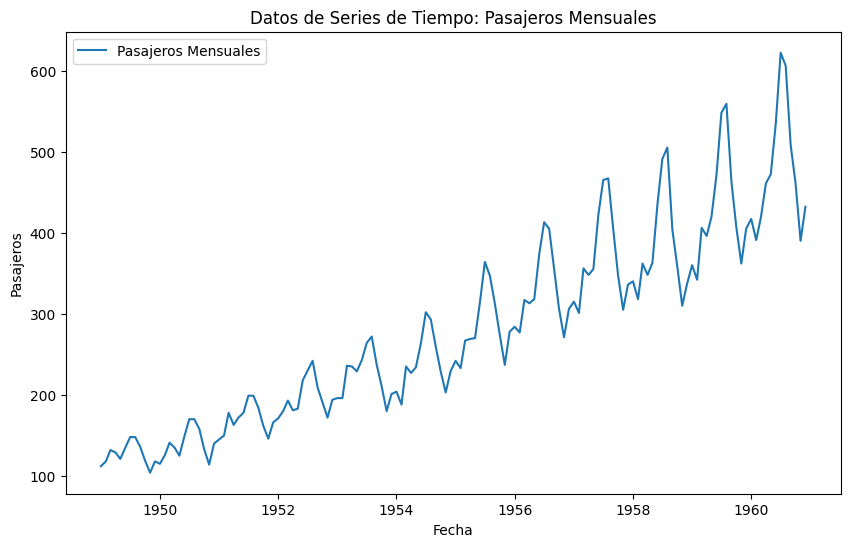

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9bdf0_0a/g2hyhjix.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9bdf0_0a/95zjtbqx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17943', 'data', 'file=/tmp/tmp9bdf0_0a/g2hyhjix.json', 'init=/tmp/tmp9bdf0_0a/95zjtbqx.json', 'output', 'file=/tmp/tmp9bdf0_0a/prophet_modelgju78io9/prophet_model-20240717044545.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:45:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:45:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


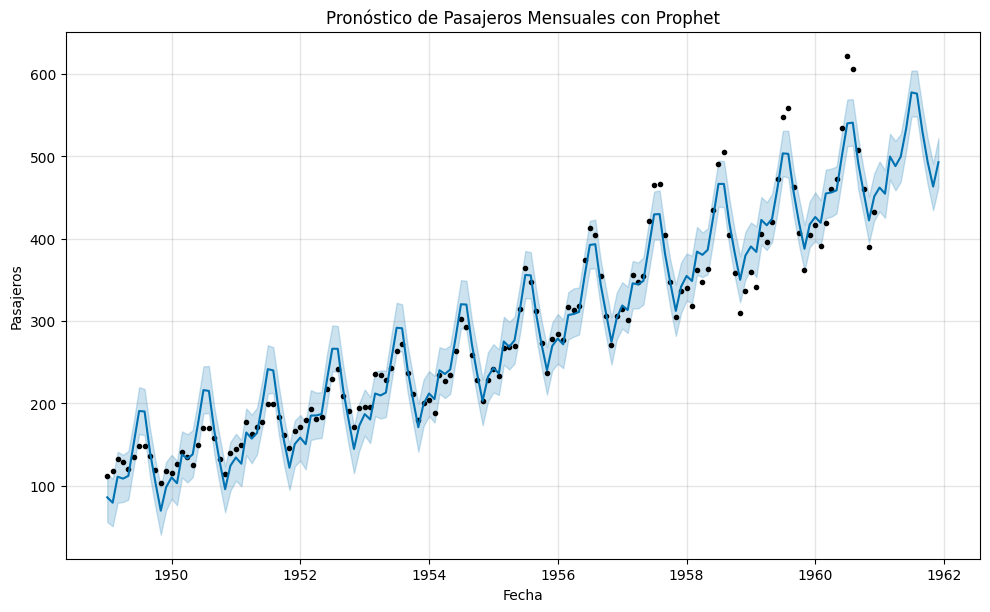

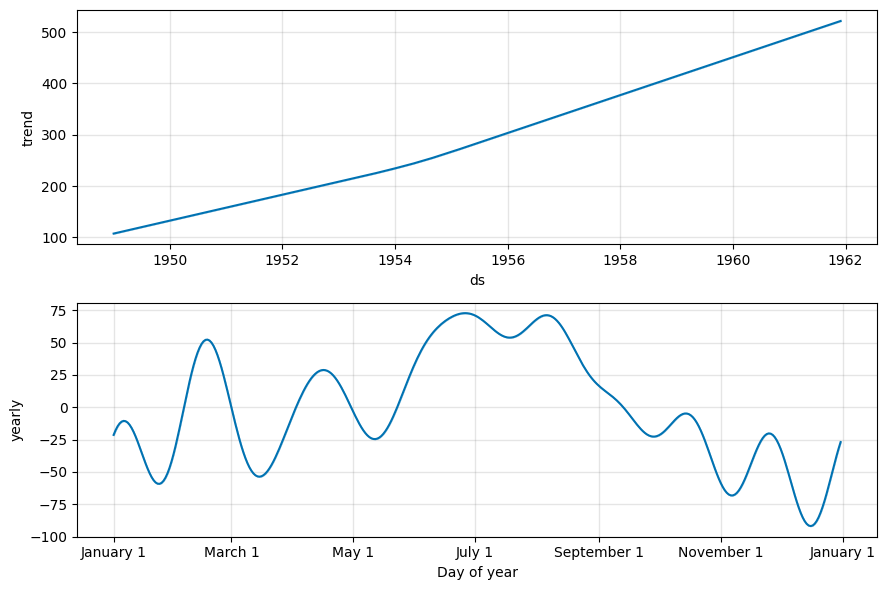

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# Cargar datos de ejemplo

data = pd.read_csv('/content/AirPassengers.csv', parse_dates=['Month'], index_col='Month')
series = data['#Passengers']
data = data.reset_index()
data.columns = ['ds', 'y']

# Visualizar datos
plt.figure(figsize=(10, 6))
plt.plot(data['ds'], data['y'], label='Pasajeros Mensuales')
plt.title('Datos de Series de Tiempo: Pasajeros Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Pasajeros')
plt.legend()
plt.show()

# Construir el modelo Prophet
model = Prophet()
model.fit(data)

# Realizar pronósticos
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Visualizar pronósticos
fig = model.plot(forecast)
plt.title('Pronóstico de Pasajeros Mensuales con Prophet')
plt.xlabel('Fecha')
plt.ylabel('Pasajeros')
plt.show()

# Visualizar componentes del modelo
fig2 = model.plot_components(forecast)
plt.show()


Epoch 1/20
113/113 - 4s - loss: 0.0288 - 4s/epoch - 37ms/step
Epoch 2/20
113/113 - 1s - loss: 0.0115 - 507ms/epoch - 4ms/step
Epoch 3/20
113/113 - 1s - loss: 0.0050 - 556ms/epoch - 5ms/step
Epoch 4/20
113/113 - 1s - loss: 0.0035 - 554ms/epoch - 5ms/step
Epoch 5/20
113/113 - 1s - loss: 0.0032 - 587ms/epoch - 5ms/step
Epoch 6/20
113/113 - 0s - loss: 0.0033 - 395ms/epoch - 3ms/step
Epoch 7/20
113/113 - 1s - loss: 0.0033 - 549ms/epoch - 5ms/step
Epoch 8/20
113/113 - 1s - loss: 0.0030 - 542ms/epoch - 5ms/step
Epoch 9/20
113/113 - 1s - loss: 0.0036 - 517ms/epoch - 5ms/step
Epoch 10/20
113/113 - 1s - loss: 0.0032 - 512ms/epoch - 5ms/step
Epoch 11/20
113/113 - 1s - loss: 0.0032 - 562ms/epoch - 5ms/step
Epoch 12/20
113/113 - 0s - loss: 0.0032 - 469ms/epoch - 4ms/step
Epoch 13/20
113/113 - 1s - loss: 0.0034 - 582ms/epoch - 5ms/step
Epoch 14/20
113/113 - 0s - loss: 0.0029 - 305ms/epoch - 3ms/step
Epoch 15/20
113/113 - 0s - loss: 0.0032 - 316ms/epoch - 3ms/step
Epoch 16/20
113/113 - 0s - loss: 0.0

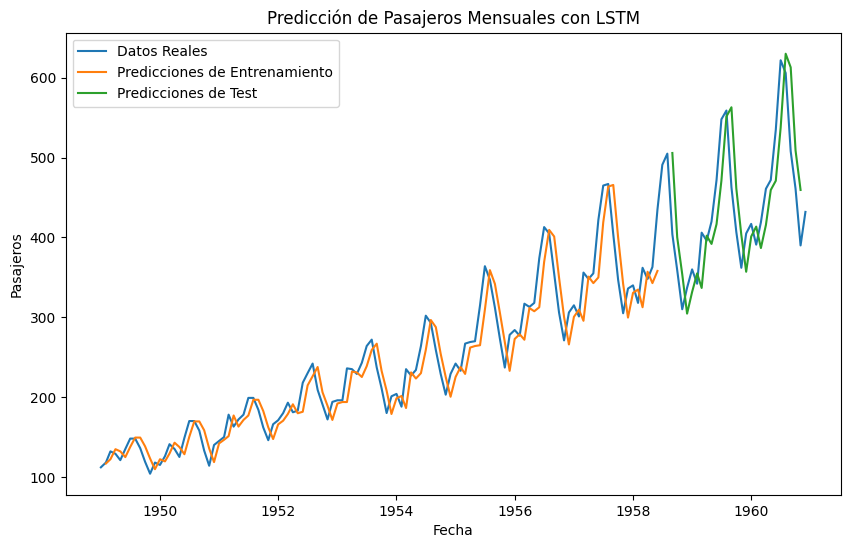

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Cargar datos de ejemplo
data = pd.read_csv('/content/AirPassengers.csv', parse_dates=['Month'], index_col='Month')


# Preprocesamiento de datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values)

train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back - 1):
        X.append(dataset[i:(i + look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshape data to [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Construir el modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1, look_back)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2)

# Realizar predicciones
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invertir la normalización de los datos
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.plot(data.index, data.values, label='Datos Reales')
plt.plot(data.index[look_back:len(train_predict) + look_back], train_predict, label='Predicciones de Entrenamiento')
plt.plot(data.index[len(train_predict) + (look_back * 2) + 1:len(data) - 1], test_predict, label='Predicciones de Test')
plt.title('Predicción de Pasajeros Mensuales con LSTM')
plt.xlabel('Fecha')
plt.ylabel('Pasajeros')
plt.legend()
plt.show()
